<a href="https://colab.research.google.com/github/luisciruelo/03MIAR_10_A_2022-23_Algoritmos-de-Optimizacion/blob/main/Luis_Ciruelo_Sanz_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Luis Ciruelo Sanz <br>
https://colab.research.google.com/drive/1zV0JYoPnIoOxe2W97BR-rnyeD39i-Qzt?usp=sharing

https://github.com/luisciruelo/03MIAR_10_A_2022-23_Algoritmos-de-Optimizacion


In [ ]:
import math

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

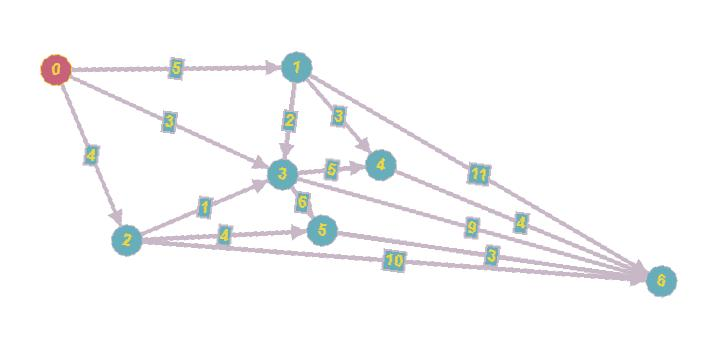

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [ ]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [ ]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################  
def Precios(TARIFAS):
################################################################ 
  #Total de Nodos
  N = len(TARIFAS[0])
  
  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n 
  RUTA = [ [""]*N for i in [""]*N]
  
  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i
      
      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN
        
  return PRECIOS,RUTA
################################################################

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)  
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")  
for i in range(len(TARIFAS)):
  print(RUTA[i]) 

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde 
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta]) 

print("\nLa ruta es:")  
calcular_ruta(RUTA, 3,6) 


La ruta es:


3

## Problema de Asignacion de tarea

In [ ]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A 
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

In [ ]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



#valor((3,2,  ),COSTES)

valor((1,0,2,3),COSTES)

73

In [ ]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [ ]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [ ]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [ ]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0: 
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL
 
    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos 
    NODOS.extend(HIJOS) 

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]
   
  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )
      


ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


## Optativo

- Generar matrices con valores aleatorios de mayores
dimensiones (5,6,7,...) y ejecutar ambos algoritmos.
- ¿A partir de que dimensión el algoritmo por fuerza bruta
deja de ser una opción?
- ¿Hay algún valor de la dimensión a partir de la cual el
algoritmo de ramificación y poda también deja de ser una
opción válida?

In [ ]:
#complejidad O(n!) para fuerza bruta
from itertools import permutations

def fuerza_bruta(COSTES):
  mejor_solucion = float("inf")
  asignacion = None
  iteracion = 0
  # Para cada permutación posible calculamos cada uno de los costes y nos quedamos con el mejor,
  # al recorrer cada una de ellas tenemos un coste computacional del orden de O(n!) 
  for permutacion in permutations(range(len(COSTES))):
    iteracion +=1
    cost = 0
    for i, j in enumerate(permutacion):
      cost += COSTES[i][j]
    # Comparamos y nos quedamos con el menor coste.
    if cost < mejor_solucion:
      mejor_solucion = cost
      asignacion = permutacion
  return mejor_solucion, asignacion, iteracion


mejor_solucion, asignacion, iteracion = fuerza_bruta(COSTES)

print(f"La solucion final para una dimension de n = {len(COSTES)} es: \n- Coste {mejor_solucion}\n- Asignación {asignacion} \n- Iteraciones {iteracion} = n!")

La solucion final para una dimension de n = 4 es: 
- Coste 61
- Asignación (0, 2, 3, 1) 
- Iteraciones 24 = n!


In [ ]:

import random 
n = 12
matrix = [[random.randrange(1,100) for j in range(n)] for i in range(n)]

In [ ]:
fuerza_bruta(matrix)

(160, (8, 0, 1, 7, 2, 6, 9, 5, 3, 11, 10, 4), 479001600)

In [ ]:
ramificacion_y_poda(matrix)

La solucion final es: [{'s': (8, 0, 1, 7, 2, 6, 9, 5, 3, 11, 10, 4), 'ci': 160}]  en  46702  iteraciones  para dimension:  12


Como se puede observar por fuerza bruta al tener una complejidad de $O(n!)$ a medida que crece la dimensión del problema deja de ser una opción con dimensiones mayores de 12, por otro lado el algoritmo de ramificación y poda al tener una complejidad mucho menor para dimensiones superiores al mencionada anteriormente sigue siendo viable su uso.

Para poder calcular la dimensión a la que deja de ser viable este algoritmo, hay que tener varios factores en cuenta. Esto se debe a que el orden de complejidad de este algoritmo no es fijo y depende de varios factores:
- Rama promedio que se explora en cada nivel,  $b$
- Número de decisiones a tomar,  $m$
- Profundidad promedio del árbol,  $p$

Dando como resultado una complejidad computacional de $O(b^{(m/p)})$. Por lo que dependiendo de el número de soluciones posibles, la función de costo o la eficiencia del algoritmo implementado hace que pueda ser viable para $n$ dimensiones en ciertos problemas, pero no en otros.